In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
ds = pd.read_csv(r"C:\Users\DELL\Downloads\customer-satisfaction-mlops-main\customer-satisfaction-mlops-main\data\olist_customers_dataset.csv")

In [3]:
ds.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

In [5]:
ds['product_length_cm']

0         19.0
1         19.0
2         19.0
3         19.0
4         19.0
          ... 
115604    32.0
115605    16.0
115606    21.0
115607    27.0
115608    26.0
Name: product_length_cm, Length: 115609, dtype: float64

1. The dataset had 33 columns and 115609 entries.

In [6]:
ds.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,1.093747,2.946233,172.387379,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409
std,0.729849,2.781087,265.873969,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.870000,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,108.050000,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,189.480000,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,29.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [7]:
ds.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   14
order_delivered_carrier_date      1195
order_delivered_customer_date     2400
order_estimated_delivery_date        0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_category_name                0
product_name_lenght                  0
product_description_lenght           0
product_photos_qty       

1. From the above data we can observe that there are null values in the dataset.
2. For numerical columns these null values can be replaced with suitable mean or median value.
3. We can remove the columns like review_comment_message, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date which are irreplaceable and does not add any value to our data.

In [8]:
ds['review_score'].unique()

array([4, 5, 3, 1, 2], dtype=int64)

# This review score will be our target feature stating 1 for low satisfication and 5 for high statisfication of the customer.

In [9]:
ds.duplicated(keep ='last').sum()

272

# There are 272 duplicate rows in the dataset.

C:\Users\DELL\AppData\Local\Temp\ipykernel_12472\1064013946.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

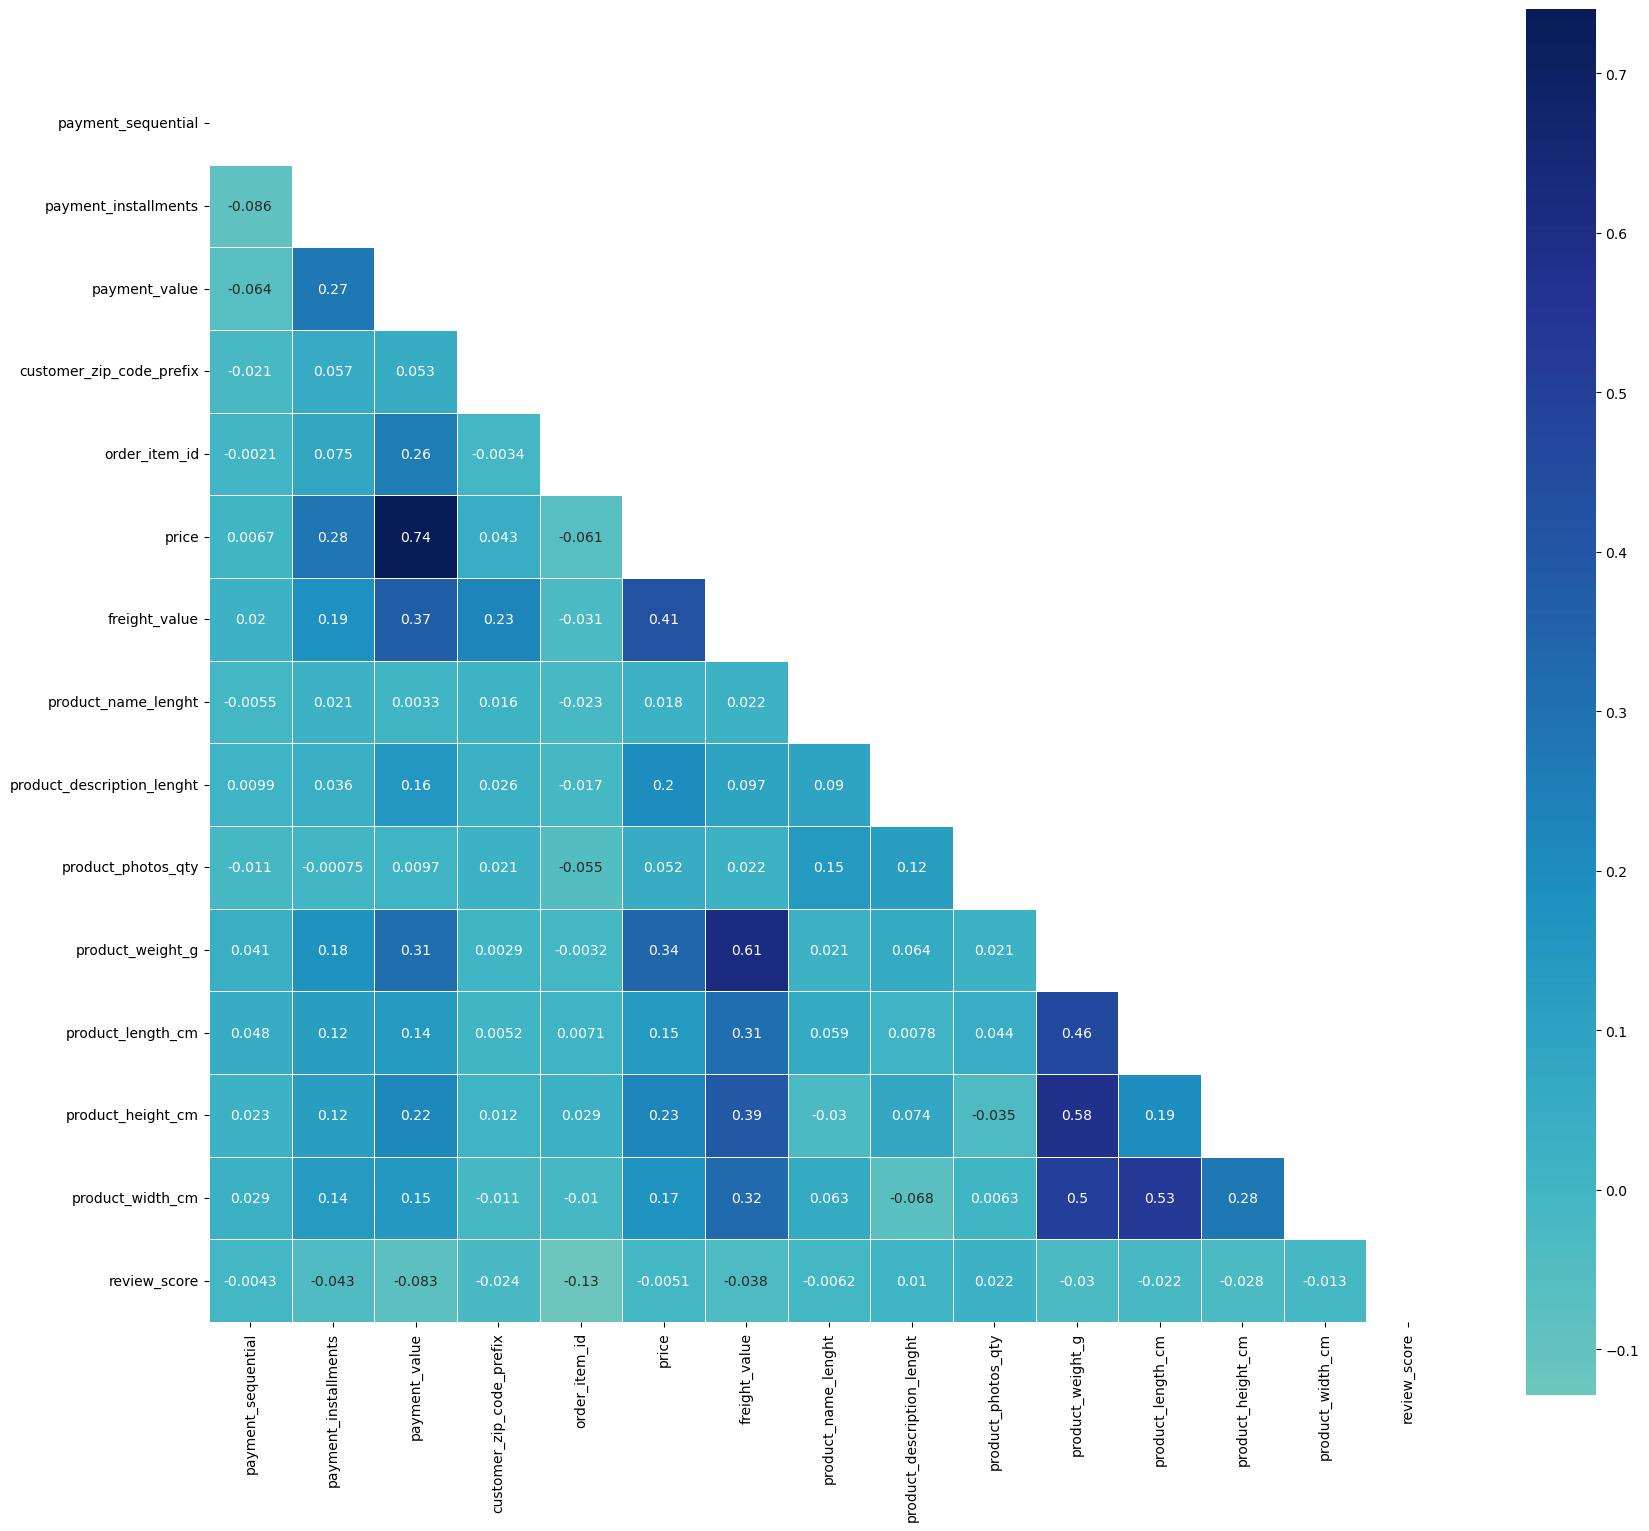

In [10]:
corr = ds.corr(method='pearson')
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 18))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot = True, mask=mask, cmap="YlGnBu", center=0,
            square=True, linewidths=.5)

In [11]:
corr

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
payment_sequential,1.000000,-0.085688,-0.064113,-0.021150,-0.002063,0.006743,0.019666,-0.005522,0.009948,-0.010707,0.040762,0.048042,0.023366,0.029402,-0.004336
payment_installments,-0.085688,1.000000,0.274698,0.056822,0.074583,0.279899,0.186068,0.020755,0.036322,-0.000752,0.178409,0.116319,0.121977,0.137656,-0.043014
payment_value,-0.064113,0.274698,1.000000,0.052696,0.256610,0.740246,0.373991,0.003256,0.156160,0.009677,0.307096,0.140026,0.217323,0.148232,-0.082848
customer_zip_code_prefix,-0.021150,0.056822,0.052696,1.000000,-0.003420,0.043081,0.225655,0.016064,0.025537,0.020633,0.002861,0.005170,0.012085,-0.010503,-0.023981
order_item_id,-0.002063,0.074583,0.256610,-0.003420,1.000000,-0.060985,-0.030591,-0.023222,-0.016518,-0.054713,-0.003206,0.007116,0.028522,-0.010081,-0.128691
price,0.006743,0.279899,0.740246,0.043081,-0.060985,1.000000,0.414640,0.017789,0.201868,0.052162,0.342101,0.145528,0.225201,0.172430,-0.005057
freight_value,0.019666,0.186068,0.373991,0.225655,-0.030591,0.414640,1.000000,0.022470,0.096814,0.021741,0.612654,0.307851,0.394518,0.323769,-0.038282
product_name_lenght,-0.005522,0.020755,0.003256,0.016064,-0.023222,0.017789,0.022470,1.000000,0.089861,0.145106,0.021019,0.058875,-0.030400,0.062903,-0.006232
product_description_lenght,0.009948,0.036322,0.156160,0.025537,-0.016518,0.201868,0.096814,0.089861,1.000000,0.117311,0.064206,0.007820,0.073917,-0.068087,0.010255
product_photos_qty,-0.010707,-0.000752,0.009677,0.020633,-0.054713,0.052162,0.021741,0.145106,0.117311,1.000000,0.021072,0.044476,-0.034579,0.006307,0.022296


From the above correlation map for the target variable(review score) most of the features are near to zero which indicates mostly there is no correlation between them, so we can drop those columns.

In [12]:
ds['review_score'].value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64